<a href="https://colab.research.google.com/github/imabhishekmahli/DL_MNIST_dataset/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

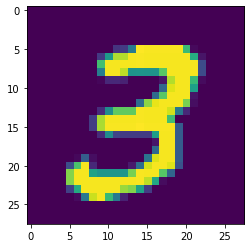

In [7]:
plt.imshow(X_train[7])

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train = X_train/255  ## to make them in the range of 0 and 1
X_test = X_test/255 

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))  # if you have more than one outpur our will use "softmax"

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.1678 - val_accuracy: 0.9761
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.1638 - val_accuracy: 0.9772
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1683 - val_accuracy: 0.9766
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.1816 - val_accuracy: 0.9753
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.1655 - val_accuracy: 0.9764
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.2030 - val_accuracy: 0.9713
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1618 - val_accuracy:

In [41]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [42]:
y_pred=y_prob.argmax(axis=1)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766

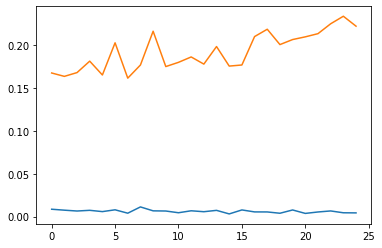

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


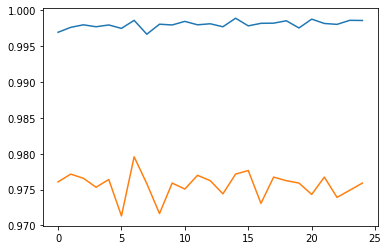

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

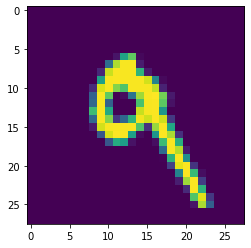

In [50]:
plt.imshow(X_test[7])

In [51]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 42ms/step


array([9])